# Libraries

In [103]:
import pandas as pd
from scipy import stats
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Activation
warnings.filterwarnings("ignore")

# Data Import

In [72]:
df = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [73]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## Getting to know the data

In [74]:
print(df.shape)

(11123, 12)


In [75]:
# List of columns
list(df.columns)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

# Data Cleaning

#### Looking at the Data set, I see that some cleaning will be necessary:
##### 1- Remove the space before the num_pages column.
#### 2- Use the bookID as the index.
#### 3- Fix authors name.
#### 4- Check for any null values.
#### 5- Check for any duplicates.
#### 6- Check for potential outliers.

In [76]:
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [77]:
# Using the df.rename function allowed us to rename the column num_pages successfully.
list(df.columns)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

In [78]:
# We can explicitly set a column as an index 
df.index = df['bookID']

## Created a new column AUTHOR and Illustrator

In [79]:
# Make a function to clear our authors and create illustrators
def splitter(string):
    """Takes string and splits the string into a new column according to the indicator we put (/)"""
    """Return a tab string"""
    tab = string.split('/')[0]
    return tab
def splitter2(string):
    tab = string.split('/')
    if len(tab) > 1: 
        return tab[1]
    else:
        return ""
df['Author'] = df['authors'].apply(splitter)
df['Illustrator'] = df['authors'].apply(splitter2)
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Author,Illustrator
bookID,,,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,Mary GrandPré
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,Mary GrandPré
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,J.K. Rowling,
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,J.K. Rowling,Mary GrandPré
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,J.K. Rowling,Mary GrandPré
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,William T. Vollmann,Larry McCaffery
45633,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,William T. Vollmann,
45634,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,William T. Vollmann,


In [80]:
#Check for Nulls
df.isnull().values.any()

False

# Title Debugging

In [81]:
#Duplicates in the title
df['title'].value_counts()

The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: title, Length: 10348, dtype: int64

There can be a repeating title because a book was written again with a new illustrator.

In [15]:
df[df['title'] == "The Iliad"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Author,Illustrator
bookID,,,,,,,,,,,,,,
1371,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics,Homer,Robert Fagles
1374,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux,Homer,Robert Fitzgerald
1376,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics,Homer,E.V. Rieu
1377,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics,Homer,W.H.D. Rouse
1796,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman,Homer,Robert Fitzgerald
12254,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge,Homer,Robert Fagles
22221,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons,Homer,
32780,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library,Homer,Andrew Lang
32782,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher,Homer,Victor G. Ambrus


In [82]:
#Before we continue to the machine learning part, I'd like to get a more in depth look at the data.

#  Exploratory Data Analysis

In [ ]:
x

In [83]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [84]:
scaler = StandardScaler()
scaler.fit(df['num_pages'])
df['num_pages'] = scaler.transform(df['num_pages'])

ValueError: Expected 2D array, got 1D array instead:
array=[652. 870. 352. ... 415. 434. 272.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Exploratory Data Conclusion

Incosistent Numbers:

Num page should be above 0 

Rating counts x100000

Text review Maximum is above 90 000...


array([[<AxesSubplot:title={'center':'bookID'}>,
        <AxesSubplot:title={'center':'average_rating'}>],
       [<AxesSubplot:title={'center':'isbn13'}>,
        <AxesSubplot:title={'center':'num_pages'}>],
       [<AxesSubplot:title={'center':'ratings_count'}>,
        <AxesSubplot:title={'center':'text_reviews_count'}>]],
      dtype=object)

<Figure size 1440x2160 with 0 Axes>

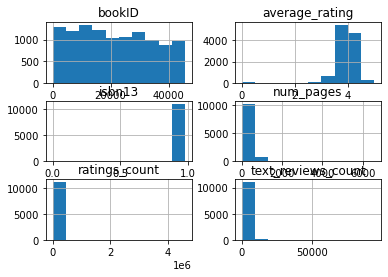

In [97]:
plt.figure(figsize=(20,30))
df.hist()


Data is skewed negatively, we can see a lot of inconsistencies

<AxesSubplot:xlabel='average_rating'>

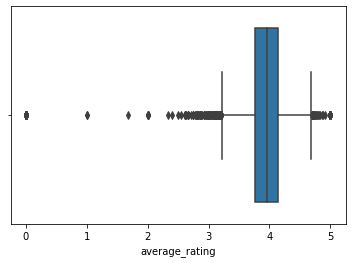

In [86]:
# Average rating
plt.figure()
sns.boxplot(x=df['average_rating'])

First visualisation of variables not showing

<AxesSubplot:xlabel='num_pages'>

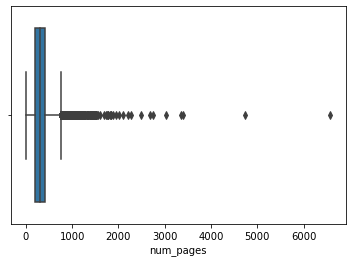

In [87]:
# Num pages
plt.figure()
sns.boxplot(x=df['num_pages'])

Outliers in the plot

<AxesSubplot:xlabel='text_reviews_count'>

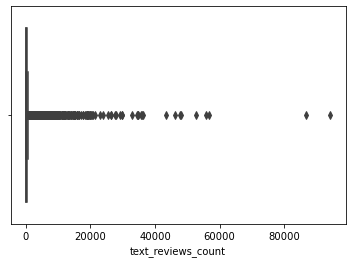

In [88]:
# Text Reviews Count
plt.figure()
sns.boxplot(x=df['text_reviews_count'])

Outliers in the plot

<AxesSubplot:xlabel='ratings_count'>

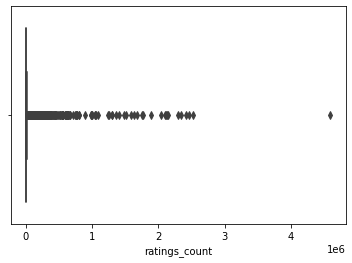

In [89]:
# Ratings count
plt.figure()
sns.boxplot(x=df['ratings_count'])

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

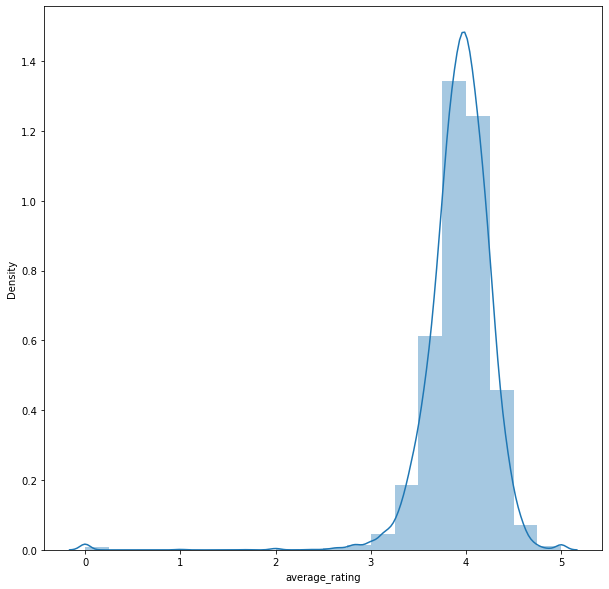

In [91]:
# Average Rating
plt.figure(figsize=(10,10))
rating= df.average_rating.astype(float)
sns.distplot(rating, bins = 20)

In [105]:
shapiro_test = stats.shapiro(df.average_rating)
shapiro_test

ShapiroResult(statistic=0.9827989339828491, pvalue=2.1973133106298246e-27)

Shapiro test output pvalue < 0.05 so we can say that the Average Rating is normally distributed with at least a 5% error margin

### Fixing the DF

In [98]:
df = df[df['num_pages'] != 0]
df = df[df['num_pages'] > 10]
df = df[df['num_pages'] < 2000]
df = df[df['ratings_count']<= 2500]
df = df[df['text_reviews_count'] < 238]
df = df[df['ratings_count'] > 0]
df = df[df['text_reviews_count'] > 0]

In [99]:
df.corr()
# je remarque rating count correlé ratings_count text-reviews count 0,780794 for both
# tehre is some correlation, variables that have impact on notes/text_counts 
#correlation between variable

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.055816,-0.002126,-0.038932,-0.021098,-0.072906
average_rating,-0.055816,1.000000,0.000623,0.200521,0.052090,-0.024047
isbn13,-0.002126,0.000623,1.000000,0.003212,0.028542,0.027597
num_pages,-0.038932,0.200521,0.003212,1.000000,0.036058,0.017517
ratings_count,-0.021098,0.052090,0.028542,0.036058,1.000000,0.780794
text_reviews_count,-0.072906,-0.024047,0.027597,0.017517,0.780794,1.000000


### Fixing the data for num page, text review count and rating count

In [92]:
#Number of distinct features
for feature in df.columns:
    distinct = np.unique(df[feature])
    print('{}: {} distinct values \n'.format(feature,len(distinct)))

bookID: 11123 distinct values 

title: 10348 distinct values 

authors: 6639 distinct values 

average_rating: 209 distinct values 

isbn: 11123 distinct values 

isbn13: 11123 distinct values 

language_code: 27 distinct values 

num_pages: 997 distinct values 

ratings_count: 5294 distinct values 

text_reviews_count: 1822 distinct values 

publication_date: 3679 distinct values 

publisher: 2290 distinct values 

Author: 4215 distinct values 

Illustrator: 3238 distinct values 



<AxesSubplot:xlabel='num_pages'>

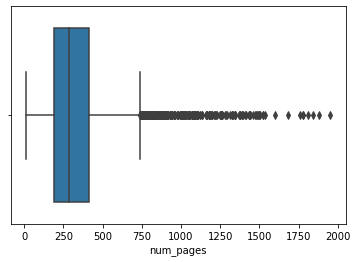

In [100]:
# Num pages
plt.figure()
sns.boxplot(x=df['num_pages'])

<AxesSubplot:xlabel='text_reviews_count'>

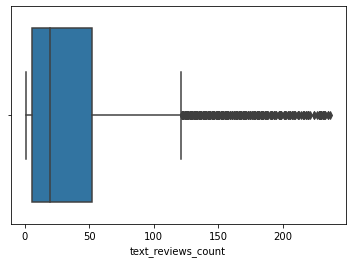

In [101]:
# Text Reviews Count
plt.figure()
sns.boxplot(x=df['text_reviews_count'])

<AxesSubplot:xlabel='ratings_count'>

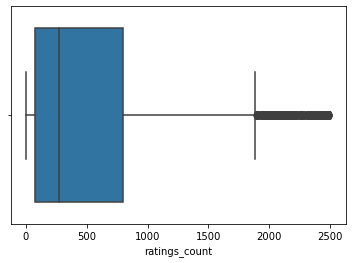

In [102]:
# Ratings count
plt.figure()
sns.boxplot(x=df['ratings_count'])

# Data Insights

Text(0.5, 1.0, 'Language Code')

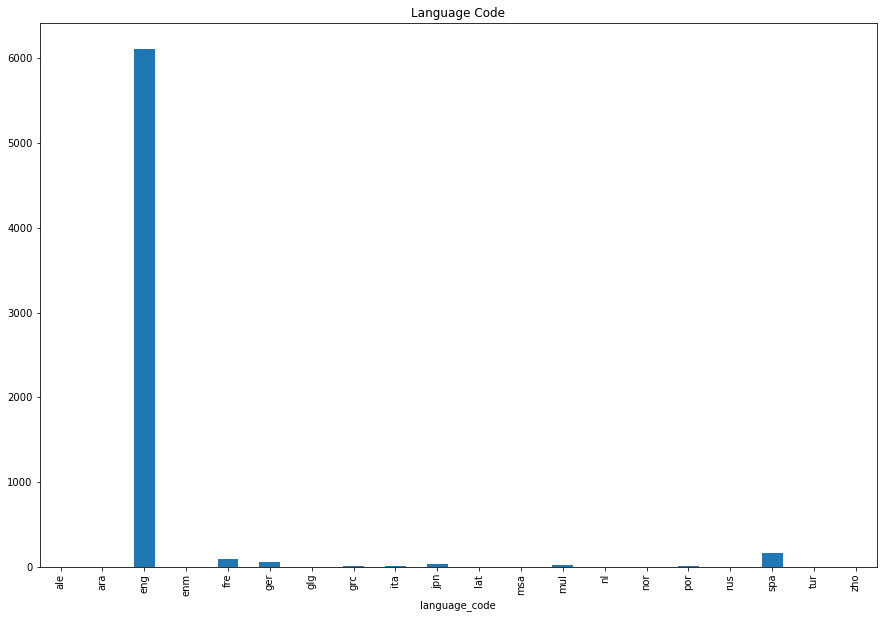

In [107]:
# Language Code Repartition
df['language_code'] = df['language_code'].replace(['en-US', 'en-CA', 'en-GB'], 'eng')
plt.figure(figsize=(15,10))
df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')

unsurprisingly most books are in english, followed by spanish, french, german and japanese. 

<AxesSubplot:xlabel='ratings_count', ylabel='title'>

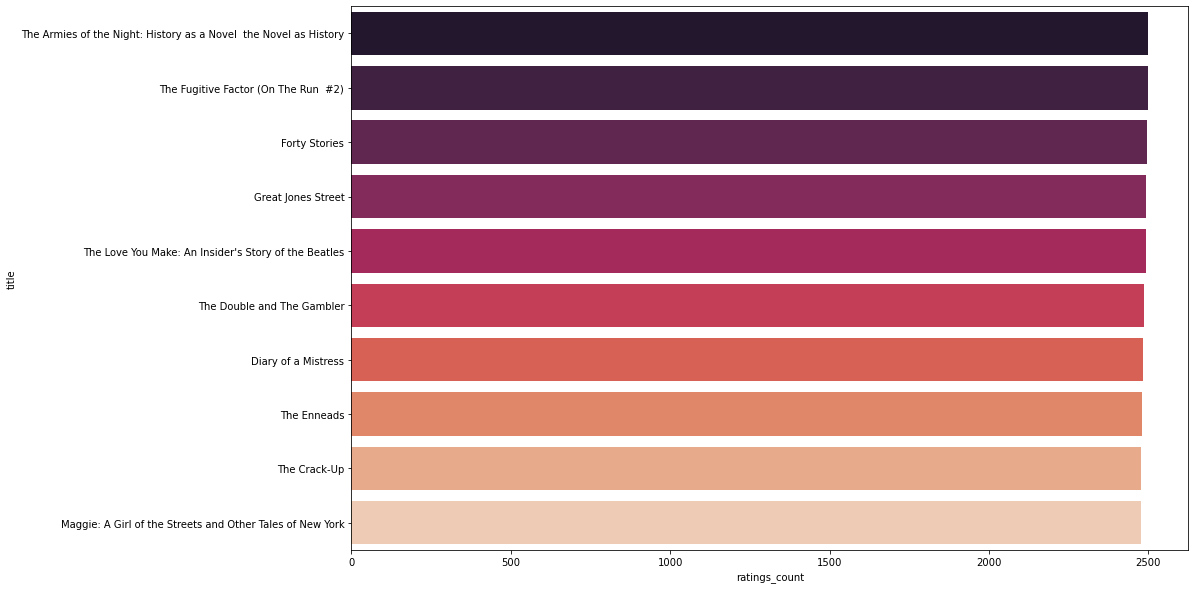

In [106]:
#Highest amount of ratings
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
plt.xlabel('Number of Ratings')
plt.ylabel('Books')

sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'rocket')


The Armies of the night is amongst the highest rated books.

Text(0, 0.5, 'Total Number Of Books')

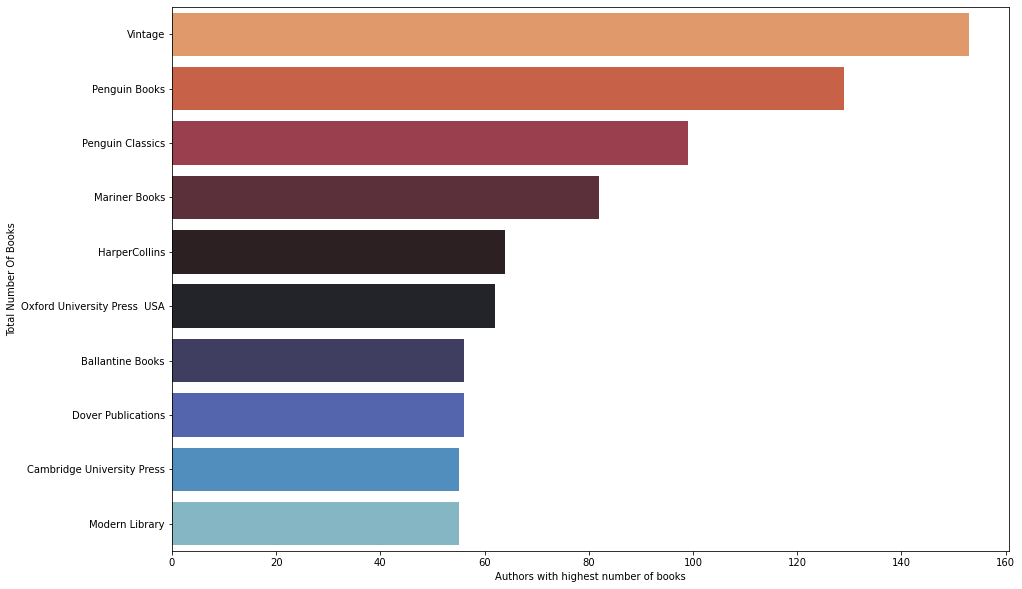

In [108]:
# Publishers with highest amount of books
most_df = df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('publisher')
plt.figure(figsize=(15,10))
sns.barplot(most_df['title'], most_df.index, palette = 'icefire_r')
plt.xlabel('Authors with highest number of books')
plt.ylabel('Total Number Of Books')

Vintage Publisher has the highest amount of books published

Text(0, 0.5, 'Total Number Of Books')

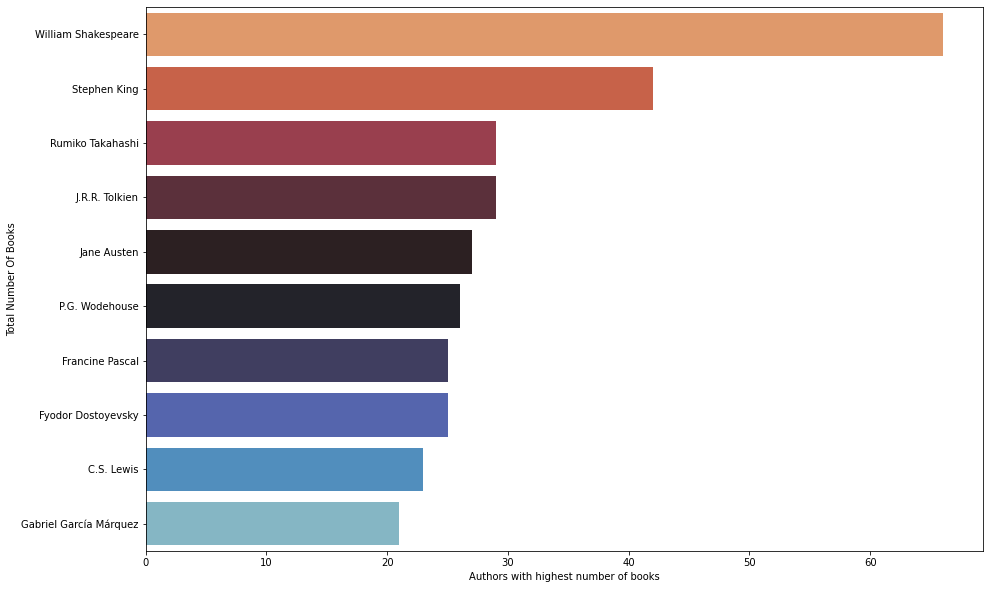

In [109]:
# Author with highest number of books
most_df = df.groupby('Author')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('Author')
plt.figure(figsize=(15,10))
sns.barplot(most_df['title'], most_df.index, palette = 'icefire_r')
plt.xlabel('Authors with highest number of books')
plt.ylabel('Total Number Of Books')

We recognize the authors with highest amounts of books like William Shakespear and Stephen King 

Text(0, 0.5, 'Total Number Of Books')

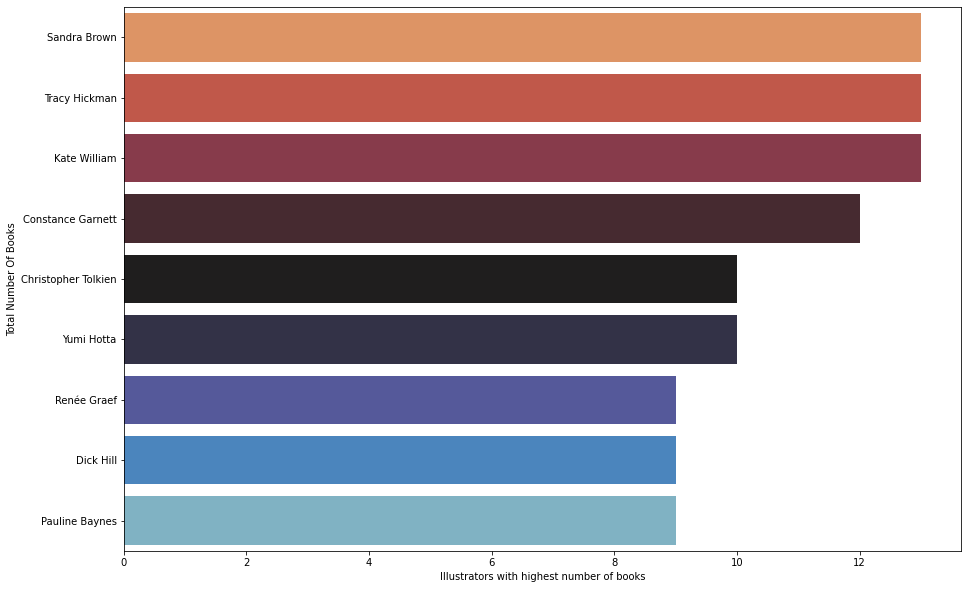

In [110]:
# Author with highest number of books
most_df = df.groupby('Illustrator')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('Illustrator')

most_df = most_df[most_df['title'] != 3536]
plt.figure(figsize=(15,10))
sns.barplot(most_df['title'], most_df.index, palette = 'icefire_r')
plt.xlabel('Illustrators with highest number of books')
plt.ylabel('Total Number Of Books')


Sandra Brown is the Illustrator with the highest amount of books illustrated

# Machine Learning Model Comparison

In [136]:
df_true = df[['num_pages', 'average_rating', 'ratings_count', 'text_reviews_count']]
X = df_true[['num_pages', 'ratings_count', 'text_reviews_count']]
y = df_true['average_rating']
# Three variables -> going out on average rating that i want to optimise!


## Feature Selection: 

I have decided to work with three variables to get the prediction in the end:

num_page ratings_count and text_reviews_count.

I have not chosen ISBN and ID as their uniqueness will not be relevant for machine prediction as they are identifiers

##  Transforming the variables for Machine Learning

In [137]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Scaler to transform data to put them into the same range 

For example num pages and text count have different ranges of value we need to normalise the data first 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

We need to split data from training to testing 
X_train will be confronted to Y_train while the 
X_test  will be for testing to see the closeness to the Y_test

In [139]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
Predicted_Scores = linReg.predict(X_test)

Will we be able to have an equation to explain Y (average rating)? 

In [140]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Predicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Predicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Predicted_Scores)))

Mean Absolute Error (MAE): 0.22351345163384315
Mean Squared Error (MSE): 0.0812107921003558
Root Mean Squared Error (RMSE): 0.28497507277015616


MAE - Testing the Average Rating Predicted to see if it is close to the real Average Rating 
MSE - Having a precise idea of the model error.
RMSE - Having a precise idea of the model error

Since the error > 1 it meanse that it's a good modelisation. Ideal is of course 0.

In [141]:
df_true = df[['num_pages', 'average_rating', 'ratings_count', 'text_reviews_count']]
X = df_true[['num_pages', 'ratings_count', 'text_reviews_count']]
y = df_true['average_rating']

In [142]:
pt = PowerTransformer()
X = pt.fit_transform(X)

power transform removes the skewing and standarsies the data at the same time

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [144]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
Predicted_Scores = linReg.predict(X_test)

In [145]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Predicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Predicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Predicted_Scores)))

Mean Absolute Error (MAE): 0.22546571340496527
Mean Squared Error (MSE): 0.08229994758132696
Root Mean Squared Error (RMSE): 0.2868796743956026


In conclusion skewing the data did not have an impact on the model

In [146]:
Rig = Ridge(alpha = 1)
Rig.fit(X_train, y_train)
Predicted_Scores = Rig.predict(X_test)

Ridge is another type of progressive regression that applies a penaliastion (here alpha = 1)

In [147]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Predicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Predicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Predicted_Scores)))

Mean Absolute Error (MAE): 0.2254637821041687
Mean Squared Error (MSE): 0.0822989062463118
Root Mean Squared Error (RMSE): 0.28687785945644495


# Deep Learning Regression

In [148]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.add(Activation('linear'))
adam = Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=adam)
history = model.fit(X_train,y_train,epochs=50,verbose=0)
history.history

{'loss': [16.265361785888672,
  14.669211387634277,
  13.268203735351562,
  12.018746376037598,
  10.887838363647461,
  9.85287094116211,
  8.904581069946289,
  8.034308433532715,
  7.235082626342773,
  6.499477386474609,
  5.823359489440918,
  5.201278209686279,
  4.63026762008667,
  4.106856346130371,
  3.6274173259735107,
  3.1894824504852295,
  2.790879487991333,
  2.4292538166046143,
  2.1020898818969727,
  1.8082133531570435,
  1.5455504655838013,
  1.3121306896209717,
  1.1062642335891724,
  0.9260479211807251,
  0.7697975635528564,
  0.6356303691864014,
  0.5216526985168457,
  0.4260650873184204,
  0.346889853477478,
  0.2824994921684265,
  0.2309582680463791,
  0.1905106008052826,
  0.15942154824733734,
  0.13615483045578003,
  0.11920420825481415,
  0.10713855177164078,
  0.0988505631685257,
  0.09342726320028305,
  0.08991868048906326,
  0.08781632035970688,
  0.0865815207362175,
  0.08594365417957306,
  0.08554241806268692,
  0.08539555221796036,
  0.0852997824549675,
  0.0

Sequencial step layer that works with 3 values (3 variables) and one exit for the prediction (average rating)

The output will be linearized with an activation function to transform the exit of my model

The learning rate determines the speed of learning, 

Model loss is programed in Mean Squarred Error

In [134]:
model.predict(
    X_test,
    batch_size=None)

41/41 [==============================] - 0s 837us/step


array([[2.9940934],
       [3.0531397],
       [3.4778495],
       ...,
       [3.2434716],
       [3.71142  ],
       [2.9438953]], dtype=float32)

We make a prediction to calculate the MAE, MSE , RMSE

In [149]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, model.predict(X_test, batch_size=None)))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, model.predict(X_test, batch_size=None)))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test, batch_size=None))))

41/41 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 0.2254853824392637
41/41 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.08239130400185607
41/41 [==============================] - 0s 947us/step
Root Mean Squared Error (RMSE): 0.28703885451599764


We have three different models, we have the same errors, in conclusion we have the same errors for the same three models. With these three variables we can not come to a better explanation for the Average Rating. 